# With Parameter

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('../data/train_qso_wo_image.csv')
df_test = pd.read_csv('../data/train_qso_wo_image.csv')

## Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
s.fit(data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2', 'petroR50_g', 'petroR50_r']])
data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2', 'petroR50_g', 'petroR50_r']] = s.transform(data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2', 'petroR50_g', 'petroR50_r']])

## Train Test Split

In [30]:
X = data[['ug', 'ur', 'ui', 'uz', 'uj', 'uk', 'uw1', 'uw2', 'gr',
       'gi', 'gz', 'gk', 'gw1', 'gw2', 'ri', 'rz', 'rw1', 'rw2', 'iz', 'ij',
       'ik', 'iw1', 'iw2', 'zj', 'zk', 'zw1', 'zw2', 'jw1', 'jw2', 'kw1',
       'kw2', 'w1w2', 'petroR50_g', 'petroR50_r']]

y = data['class_bin']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

## Model(modulos.ai parameters)

n_estimators: 914

criterion: gini

max_features: log2

class_weight: balanced_subsample 

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators = 914,
    criterion = "gini",
    max_features = "log2",
    class_weight = "balanced_subsample"
    
)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

## Metrics Output

- accuracy: 89.83%
- F1: 93.18%
- ROC_AUC: 95.2%

In [44]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('F1:', metrics.f1_score(y_test,y_pred))

Accuracy: 0.8983050847457628
F1: 0.9318181818181819


In [45]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[12,  4],
       [ 2, 41]])

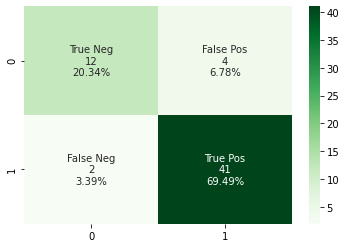

In [36]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

plt.savefig('../figures/rfc_p_cf_matrix')

In [37]:
#generate a no skill prediction
ns_prob = [0 for _ in range(len(y_test))]
#prodict probability
clf_prob = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only/
clf_prob = clf_prob[:, 1]

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_auc = roc_auc_score(y_test, ns_prob)
lr_auc = roc_auc_score(y_test, clf_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.956


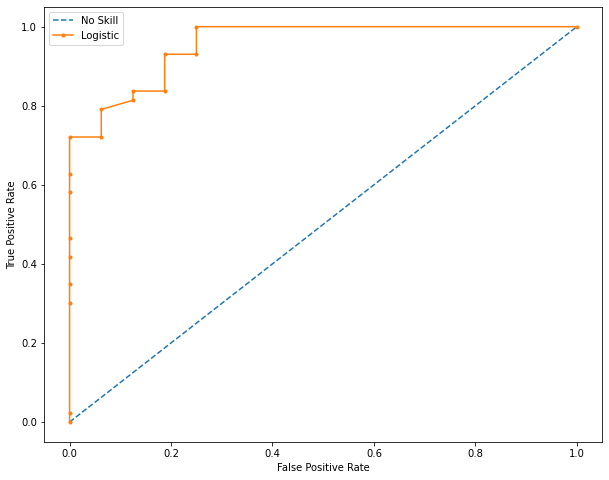

In [39]:
import matplotlib.pyplot as plt
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_prob)


plt.figure(figsize=(10, 8))
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.savefig('../figures/rfc_v1_rocauc.png')
# show the plot
plt.show()



In [40]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

ij            0.093133
gk            0.070223
gw1           0.061266
rw1           0.049834
ik            0.039543
gz            0.038600
zk            0.037283
rz            0.033802
uk            0.033760
zj            0.033558
petroR50_r    0.032738
gi            0.030904
iw1           0.028963
gw2           0.028017
rw2           0.027728
jw2           0.025097
uw1           0.024412
iw2           0.023848
zw1           0.022823
uj            0.022637
ug            0.022425
ri            0.021423
gr            0.020925
ur            0.019438
kw2           0.019256
jw1           0.019107
zw2           0.017690
w1w2          0.017478
iz            0.016774
uz            0.015570
kw1           0.015215
ui            0.013447
uw2           0.012488
petroR50_g    0.010595
dtype: float64

No handles with labels found to put in legend.


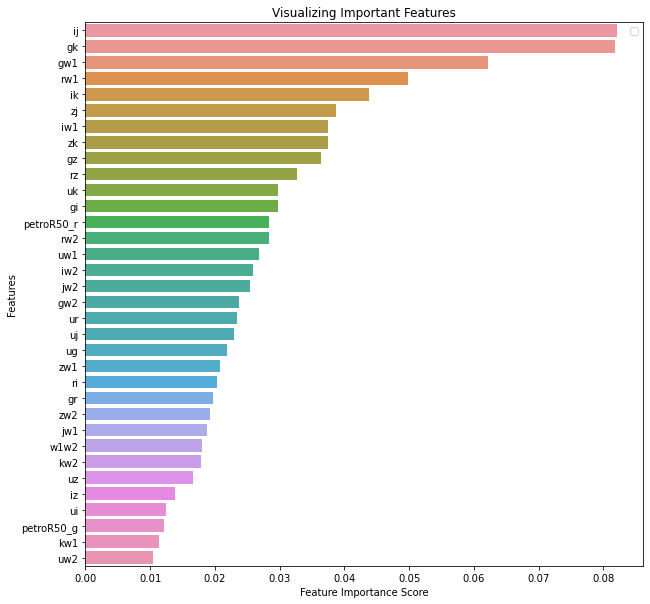

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 10))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.savefig('../figures/rfc_v1_features.png')
plt.show()



## Valuation: Is there overfitting or underfitting happening to the data?

# Discussion

In [41]:
df = pd.read_csv('../data/train_qso.csv')

<AxesSubplot:xlabel='ij', ylabel='Count'>

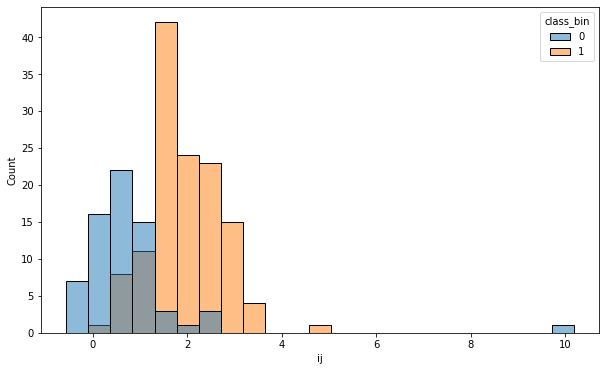

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data = df,x="ij", hue="class_bin")

<AxesSubplot:xlabel='gk', ylabel='Count'>

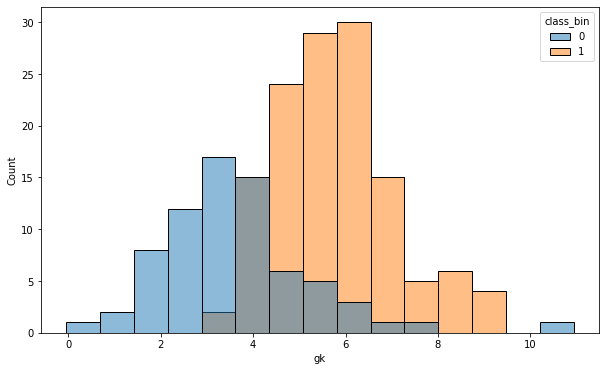

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data = df,x="gk", hue="class_bin")

<AxesSubplot:xlabel='gw1', ylabel='Count'>

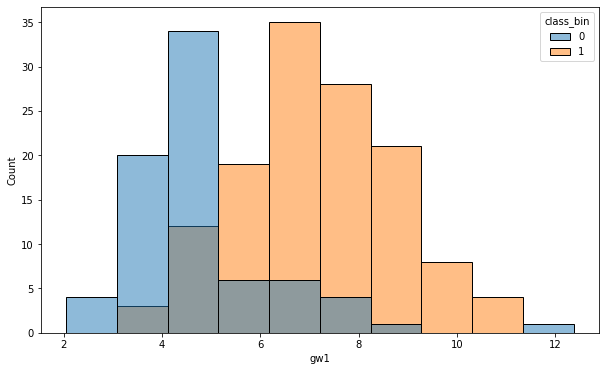

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data = df,x="gw1", hue="class_bin")